Actually I have a power cable image and i want to measure the thickness of each layer in the cross-section of power cable. For more information, please find image as given below:

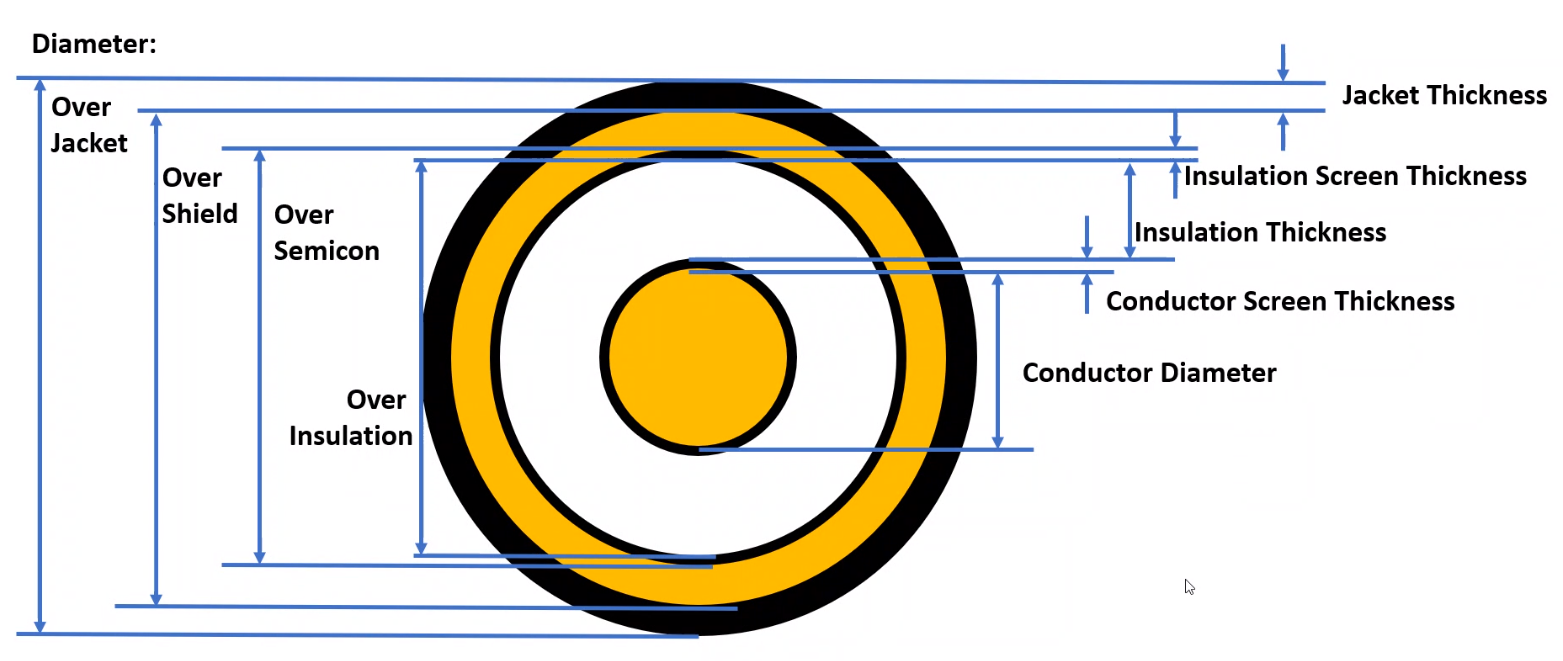

Here is the original image of cables:

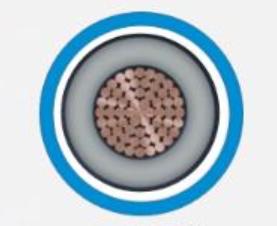

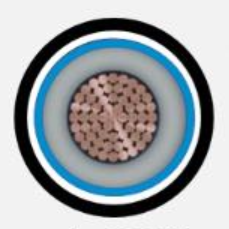

Here is the code to detect concentric circle using Hough Circle method of OpenCV:

In [ ]:
import numpy as np
import cv2
image = cv2.imread("GoldenSpike.png",0)


In [ ]:


output = cv2.imread("GoldenSpike.png",1)
cv2.imshow("Original image", image)
cv2.waitKey()

blurred = cv2.GaussianBlur(image,(11,11),0)

cv2.imshow("Blurred image", blurred)
cv2.waitKey()
setItem=set()
previous=0;
minR=4
for maxR in range(9,300,9):
    # Finds circles in a grayscale image using the Hough transform
    circles = cv2.HoughCircles(blurred, cv2.HOUGH_GRADIENT, 1, 100,
                             param1=100,param2=100,minRadius=minR,maxRadius=maxR)
    minR+=4
    # cv2.HoughCircles function has a lot of parameters, so you can find more about it in documentation
    # or you can use cv2.HoughCircles? in jupyter nootebook to get that 

    # Check to see if there is any detection
    if circles is not None:
        # If there are some detections, convert radius and x,y(center) coordinates to integer
        circles = np.round(circles[0, :]).astype("int")

        for (x, y, r) in circles:
            # Draw the circle in the output image
            cv2.circle(output, (x, y), r, (0,255,0), 1)
            # Draw a rectangle(center) in the output image
            cv2.rectangle(output, (x - 2, y - 2), (x + 2, y + 2), (0,255,0), -1)
            setItem.add(r)

lst=sorted(setItem)
print("Length of List =", len(lst))
for item in lst:
    print(item)

cv2.imshow("Detections",output)
cv2.imwrite("CirclesDetection.jpg",output)
cv2.waitKey()